In [1]:
import sys, os
import datetime
from settings import *
sys.path.insert(0, PYSBF_PATH)
from pysbf import *
from IPython.display import display, Markdown, clear_output

import warnings
warnings.filterwarnings('ignore')

import IPython
IPython.display.HTML('<style> select, textarea, input { font-family: Courier New; } </style>')

Matplotlib created a temporary cache directory at /tmp/matplotlib-185k04mu because the default path (/home/sbf/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


NameError: name 'warnings' is not defined

## Set galaxy name

In [2]:
name = "u12517"
# name = "p158229"

In [3]:
IN_FOLDER, OUT_FOLDER

('/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/data/wfc3/',
 '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/output/')

In [4]:
outFolder = OUT_FOLDER + "Outputs_"+name+'/'
logFile = outFolder+name+"_model_log.csv"

df_log = open_log_df(logFile)
uuid = df_log.at["uuid", "value"]

X0 = int(float(df_log.at["X0", "value"])) # Object Center X0 [pixel]
Y0 = int(float(df_log.at["Y0", "value"])) # Object Center X0 [pixel]
XX = int(float(df_log.at["X_pixels", "value"]))
YY = int(float(df_log.at["Y_pixels", "value"]))
# _ = Logtext(logFile, "log file")

# df_log

In [5]:
sky_sigma = float(df_log.at["sky_std", "value"])

In [6]:
sky_sigma = 100

- not different by a lot
- model pswf --> blur psf
- trying multiple psf --> averaging out the results, or using them for error measuremnt
- combinedj.on.bright.psf.14219 sharpest one, good starting 
- PSFstd --> mode l psf from space teelscope
- PSF = inFolder+"/psflibrary/PSFSTD_WFC3IR_F110W.fits"

In [7]:
IN_FOLDER

'/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/data/wfc3/'

In [8]:
PSF = IN_FOLDER+"/psflibrary/combinedj.on.psf.14654"  # --> refer to the project
PSF = "/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/wfc3-16262/e137024/e137j.psf3"

In [9]:
! ls {IN_FOLDER}"/psflibrary/combined*"

ls: cannot access '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/data/wfc3//psflibrary/combined*': No such file or directory


In [10]:
import glob

psf_list = glob.glob(IN_FOLDER+"/psflibrary/combinedj*")
psf_list

['/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/data/wfc3//psflibrary/combinedj.psf.14219',
 '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/data/wfc3//psflibrary/combinedj.on.psf.14654',
 '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/data/wfc3//psflibrary/combinedj.on.psf.14219',
 '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/data/wfc3//psflibrary/combinedj.psf.11712',
 '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/data/wfc3//psflibrary/combinedj.on.bright.psf.14219',
 '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/data/wfc3//psflibrary/combinedj.bright.psf.14219']

point source mask, comes from likenew6 (tuned for infrared bands)

- ptm6 default output of likenew: sometimes misses objects that are super bright
- ptm6b --> produced after further manipulations

In [11]:
DIR = "{}{}_{}/".format(outFolder, name, uuid)

config = {
    "DIR": DIR,
    "PSF": PSF,
    "PRF": "model.000",
    "RSD": "resid.000",
#     "PTM": "{}_se_lknjj.ptm6b".format(name),
    "PTM": "{}/hybridj.ptm6b".format(DIR),
    }

W = SBF_widgets(XX, YY, X0, Y0, **config)

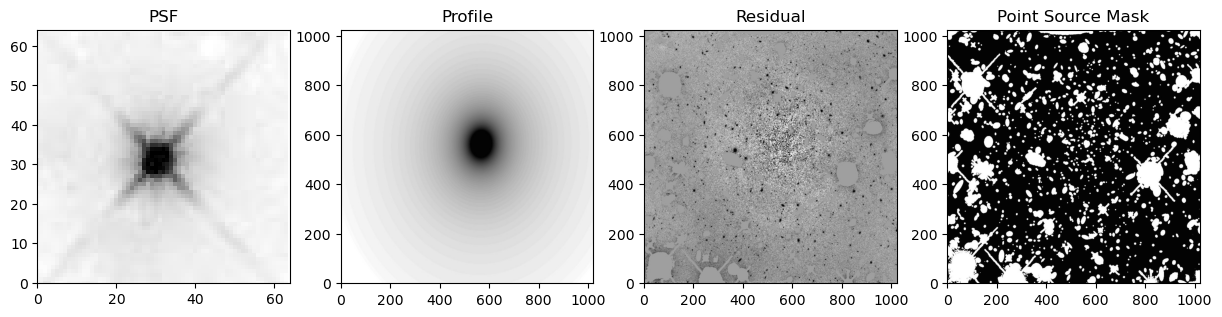

In [12]:
_ = eval_plots(config)

In [13]:
W.settings()

In [14]:
# dir(W)

In [15]:
# <g> is the average galaxy brighness inside the anulus
# <r> average radius

# read(2,2000) bar1(k), barg(k), barr(k), ek0(k)
# line # 441  AVG:  <1> = 0.480    <g> =  7889.3    <r> = 198.3    E(k=0) =  3689.0 

Can't open display 

Program received signal SIGSEGV: Segmentation fault - invalid memory reference.

Backtrace for this error:
#0  0x77614163a7ba
#1  0x776141639993
#2  0x77614104251f
#3  0x7761414291bc
#4  0x61483271f5fa
#5  0x61483271cb0b
#6  0x614832717f08
#7  0x614832713fce
#8  0x6148327140bb
#9  0x6148327226ae
#10  0x6148326fb58c
#11  0x6148326fb791
#12  0x61483266721c
#13  0x6148326685aa
#14  0x614832620f3f
#15  0x61483261a840
#16  0x61483261d7d9
#17  0x614832618ead
#18  0x776141029d8f
#19  0x776141029e3f
#20  0x614832618da4
#21  0xffffffffffffffff
Segmentation fault (core dumped)


FileNotFoundError: [Errno 2] No such file or directory: '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/output/Outputs_u12517/u12517_eb317d7f178c/tv.jpg'

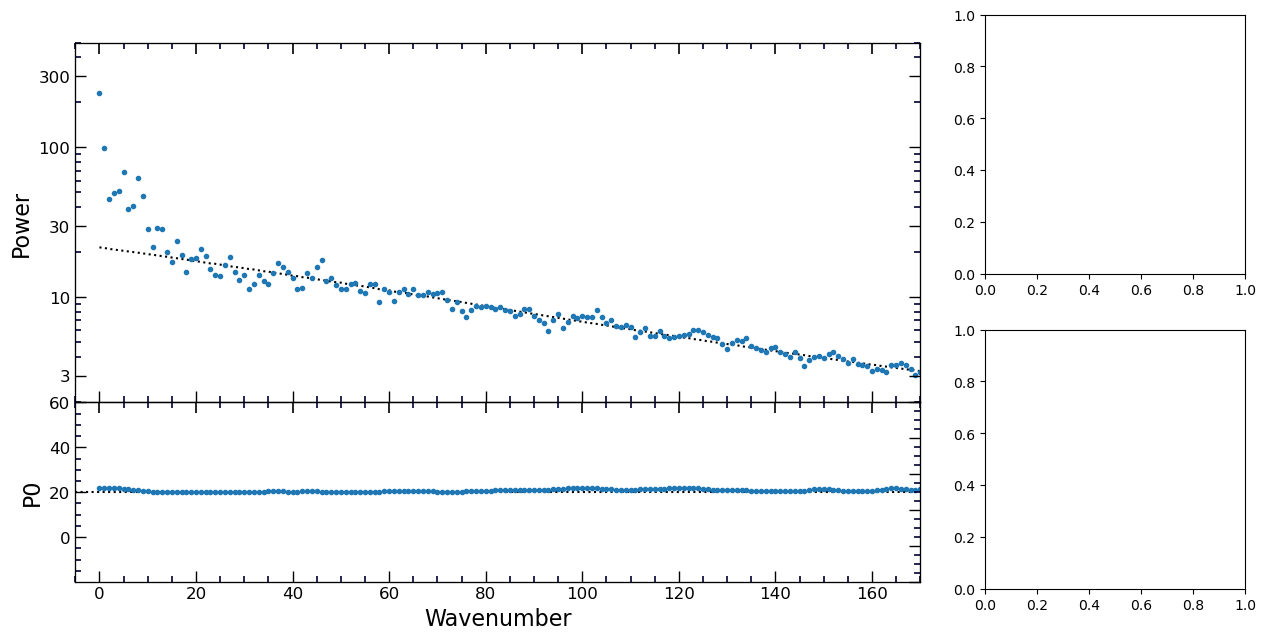

In [16]:
(ax1, ax2, ax3, ax4), psf_info, P0 = W.get_sbf()
# ax2.set_ylim(130, 140)

In [17]:
W.DIR

'/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/output/Outputs_u12517/u12517_eb317d7f178c/'

In [18]:
! ls /media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/output/Outputs_u12517/u12517_eb317d7f178c/power.c0 

/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/output/Outputs_u12517/u12517_eb317d7f178c/power.c0


In [19]:
# plotting all iteration on top of each other
# sky_sigma get from the log file
# flagging the tv commands when doing iterations


## PSF power spectrum

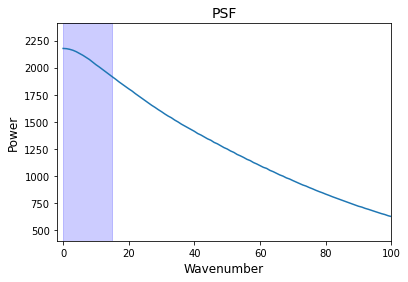

In [20]:
ax = plot_psf_power(psf_info, K_upper_limit = 100)

In [22]:
W.get_sbf_all(angle_range=(10,180))

0 32 - 64
1 64 - 128
2 128 - 256


{'c0': (22.6, 0.563), 'c1': (21.07, 0.19), 'c2': (15.53, 0.145)}

In [23]:
# P0, dP0
W.get_sbf_all()

0 32 - 64
1 64 - 128
2 128 - 256


{'c0': (22.06, 0.352), 'c1': (20.22, 0.159), 'c2': (15.61, 0.158)}

In [24]:
len(psf_list)

6

In [25]:
psf_list

['/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/data/wfc3//psflibrary/combinedj.psf.14219',
 '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/data/wfc3//psflibrary/combinedj.on.psf.14654',
 '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/data/wfc3//psflibrary/combinedj.on.psf.14219',
 '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/data/wfc3//psflibrary/combinedj.psf.11712',
 '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/data/wfc3//psflibrary/combinedj.on.bright.psf.14219',
 '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/data/wfc3//psflibrary/combinedj.bright.psf.14219']

In [23]:
# W.get_sbf_iter?

In [24]:
sky_sigma

100

In [25]:
R = W.get_sbf_iter(n_iter=100, sky_sigma=sky_sigma, psf_list=psf_list)

In [26]:
R

{'iter000': {'P0': (21.05, 0.47),
  'K': array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
          11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
          22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
          33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
          44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
          55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
          66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
          77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
          88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
          99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
         110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
         121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
         132., 133., 134., 135., 136., 137., 138., 139., 140.

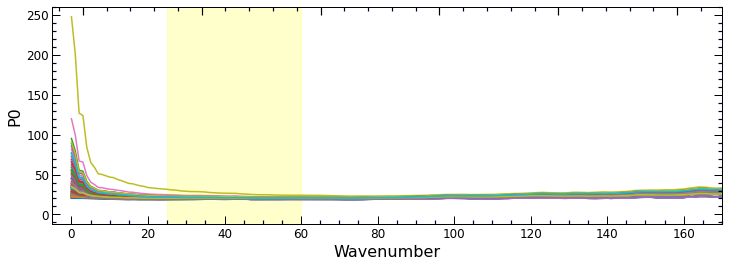

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

for k, v in R.items():
    ax.plot(v["K"],v["P"])

ax.set_ylabel("P0", fontsize=16)
ax.set_xlabel("Wavenumber", fontsize=16)

x_ax, y_ax = set_axes(ax, fontsize=12)
ax.set_xlim(-5, 170)
# ax.set_ylim(P0_h - 40, P0_h + 40)

KS0, KS1 = W._k_fit.value
ax.axvspan(KS0, KS1, color="yellow", alpha=0.2)


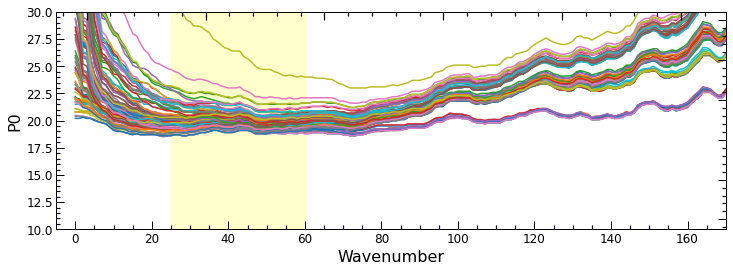

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

for k, v in R.items():
    ax.plot(v["K"],v["P"])

ax.set_ylabel("P0", fontsize=16)
ax.set_xlabel("Wavenumber", fontsize=16)

x_ax, y_ax = set_axes(ax, fontsize=12)
ax.set_xlim(-5,170)
ax.set_ylim(10,30)
# ax.set_ylim(P0_h - 40, P0_h + 40)

KS0, KS1 = W._k_fit.value
ax.axvspan(KS0, KS1, color="yellow", alpha=0.2)


In [29]:
# figuring out the ylimit 